In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import perceval as pcvl
import perceval.components as symb
import numpy as np
import sympy as sp
import networkx as nx

from Loop import *

In [3]:
def fusion75():
    bsg = pcvl.Circuit(12, name = "Fusion75")
    #fusion 75
    
    bsg.add((8,9), symb.BS.H())
    bsg.add((10,11), symb.BS.H())
    
    #interaction (A,B) with (C,D)
    bsg.add((3,4), symb.BS.H(np.pi))
    bsg.add((2,3), symb.BS.H())
    bsg.add((4,5), symb.BS.H())
    bsg.add((3,4), symb.BS.H(np.pi))

    #sinking (C,D) to (1,1)
    bsg.add((4,5), symb.BS.H(np.pi))
    bsg.add((5,6), symb.BS.H(np.pi))
    bsg.add((6,7), symb.BS.H(np.pi))
    bsg.add((7,8), symb.BS.H(np.pi))
    bsg.add((8,9), symb.BS.H(np.pi))
            
    bsg.add((4,5), symb.BS.H(np.pi))
    bsg.add((5,6), symb.BS.H(np.pi))
    bsg.add((6,7), symb.BS.H(np.pi))
    bsg.add((7,8), symb.BS.H(np.pi))
    bsg.add((8,9), symb.BS.H(np.pi))
    
    #sinking (A,B) to (1,1)
    bsg.add((2,3), symb.BS.H(np.pi))
    bsg.add((3,4), symb.BS.H(np.pi))
    bsg.add((4,5), symb.BS.H(np.pi))
            
    bsg.add((2,3), symb.BS.H(np.pi))
    bsg.add((3,4), symb.BS.H(np.pi))
    bsg.add((4,5), symb.BS.H(np.pi))

    
    #interaction (A,B) with (1,1)
    bsg.add((5,6), symb.BS.H(np.pi))
    bsg.add((4,5), symb.BS.H())
    bsg.add((6,7), symb.BS.H())
    bsg.add((5,6), symb.BS.H(np.pi))
    
    #interaction (C,D) with (1,1)
    bsg.add((9,10), symb.BS.H(np.pi))
    bsg.add((8,9), symb.BS.H())
    bsg.add((10,11), symb.BS.H())
    bsg.add((9,10), symb.BS.H(np.pi))
    

    #interaction (A,B) with (1,1)
    
    return bsg

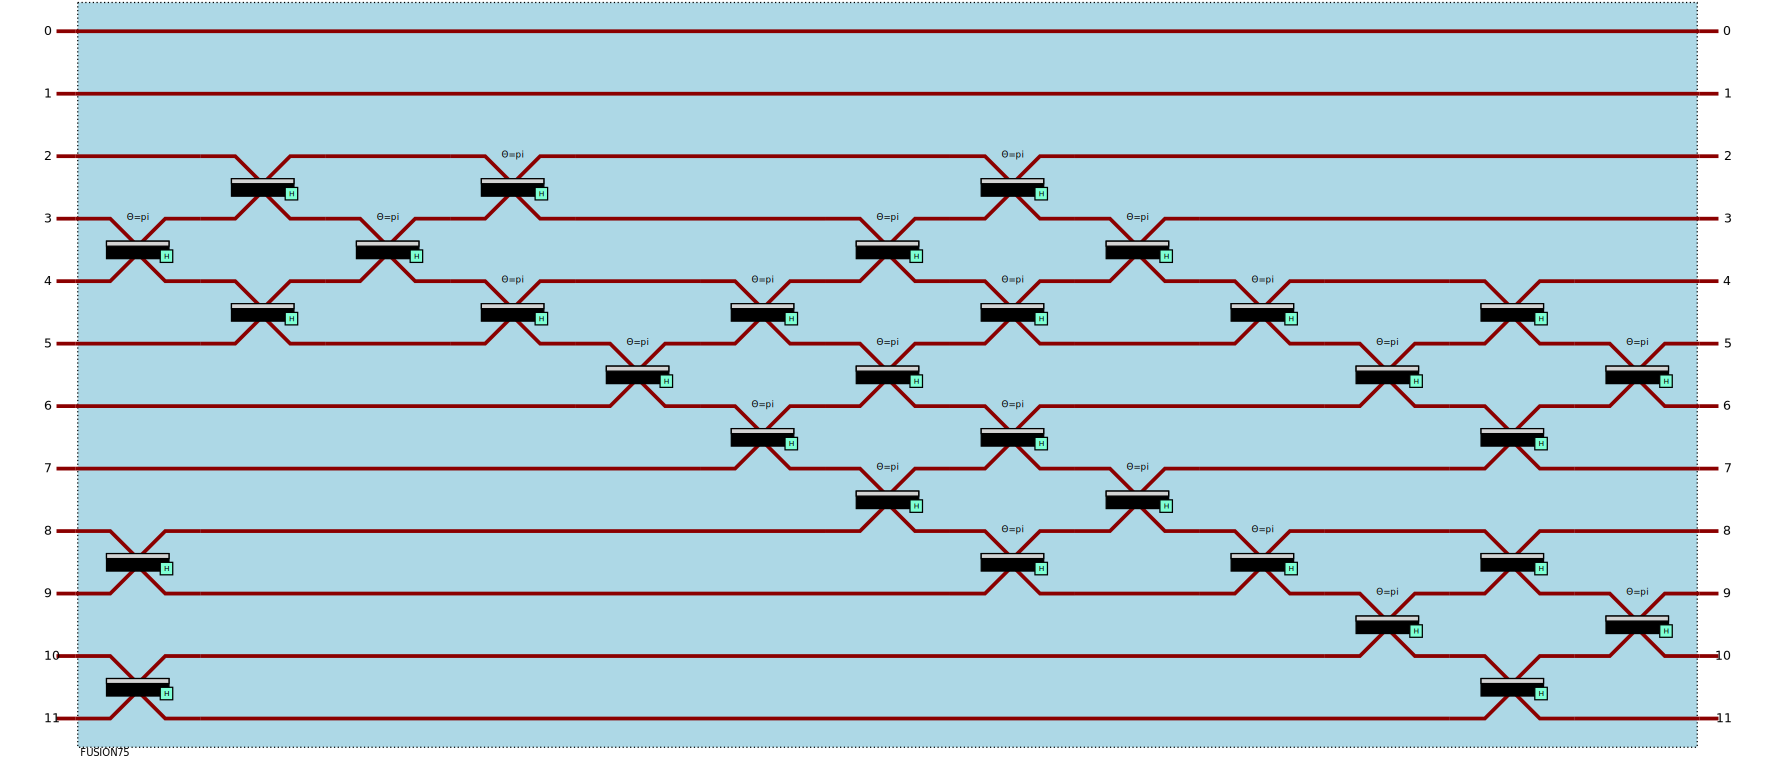

In [4]:
#build the circuit and name it
bsg = pcvl.Circuit(12, name = "BSG")
# bsg.add((0,1), symb.BS.H())
# bsg.add((2,3), symb.BS.H())

# bsg.add((0,1), symb.BS.H(np.pi))
# bsg.add((1,2), symb.BS.H(np.pi))
# bsg.add((0,1), symb.BS.H(np.pi))


# bsg.add((4,5), symb.BS.H())
# bsg.add((6,7), symb.BS.H())
# bsg.add((4,5), symb.BS.H(np.pi))
# bsg.add((5,6), symb.BS.H(np.pi))
# bsg.add((4,5), symb.BS.H(np.pi))

# bsg.add((6,7), symb.BS.H())
# bsg.add((2,3), symb.BS.H())

bsg.add(0, fusion75())

q0 = Qbit(0, logical=False)
q0.id = 0
f0 = Qbit(2, logical=False)
q1 = Qbit(4, logical=False)
q1.id = 1
f1 = Qbit(6, logical=False)
f2 = Qbit(8, logical=False)
f3 = Qbit(10, logical=False)


l = Loop(circuit=bsg, photons=photons_from_qubit([q0, f0, f1, f2, f3, q1]), qbits=[q0, f0, f1, f2, f3, q1])
pcvl.pdisplay(l.circuit, recursive=True)

In [4]:
l.calc_in_state()
l.in_state = [1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1]
l.nph = 8

In [18]:
G = nx.Graph()
G.add_nodes_from([0,1,2,3])
G.add_edge(0,1)
G.add_edge(2,3)

sg = pcvl.stategenerator.StateGenerator(pcvl.Encoding.DUAL_RAIL)
instate = sg.graph_state(graph=G)*pcvl.BasicState("|1,1,1,1>")
pcvl.pdisplay(instate)

state,prob. ampl.
"|0,1,1,0,0,1,0,1,1,1,1,1>",-1/4
"|1,0,1,0,0,1,0,1,1,1,1,1>",-1/4
"|0,1,0,1,0,1,1,0,1,1,1,1>",-1/4
"|1,0,0,1,0,1,1,0,1,1,1,1>",1/4
"|0,1,1,0,1,0,0,1,1,1,1,1>",1/4
"|1,0,1,0,0,1,1,0,1,1,1,1>",1/4
"|1,0,0,1,1,0,1,0,1,1,1,1>",1/4
"|0,1,1,0,0,1,1,0,1,1,1,1>",1/4
"|1,0,1,0,1,0,0,1,1,1,1,1>",1/4
"|0,1,0,1,1,0,0,1,1,1,1,1>",-1/4


In [19]:
def sum_modes(state, start, end):
    res = 0
    for i in range(start, end):
        res += state[i]
    return res

l.calc_out_states(False,False)
filter_bells = {'psi-': [], 'psi+': [], 'phi+': [], 'phi-': []}
for state in pcvl.statevector.allstate_iterator(instate):
    if sum_modes(state, 4,8) == 3 and sum_modes(state, 8,12) == 3:
        # psi - 
        filter_bells['psi-'].append(state)
    elif sum_modes(state, 4,8) == 4 and sum_modes(state,8,12) == 2:
        if (state[4]+state[6]) % 2 == 1:
            #psi +
            filter_bells['psi+'].append(state)
        else:
            if (state[4]+state[6]) == 2:
                if (state[4]+state[5]) % 2 == 0:
                    filter_bells['phi+'].append(state)
                else:
                    filter_bells['phi-'].append(state)

    elif sum_modes(state, 8,12) == 4 and sum_modes(state,4,8) == 2:
        if (state[8]+state[10]) % 2 == 1:
            #psi +
            filter_bells['psi+'].append(state)
        else:
            if (state[8]+state[10]) == 2:
                if (state[8]+state[9]) % 2 == 0:
                    filter_bells['phi+'].append(state)
                else:
                    filter_bells['phi-'].append(state)
                #distinguishable phi

# len(filter_bells)

In [38]:
p = {}
backend = pcvl.backends.NaiveBackend()
backend.set_circuit(l.circuit)
sv = pcvl.StateVector("|1,0,0,1>") - pcvl.StateVector("|0,1,1,0>") 

sim = pcvl.simulators.Simulator(backend)

sum_probs = 0

from pprint import pprint
res = []
for k, v in filter_bells.items():
    filter_bells_sorted = v #sorted(v, key=lambda elem: elem[4:12])
    print('\n\n',k,'\n\n')
    prob = {}
    for bell in filter_bells_sorted:
        if str(bell[4:]) not in prob:
            prob[str(bell[4:])] = {}
        
        probamp = sim.prob_amplitude(instate,pcvl.BasicState(str(bell)))
        sum_probs += abs(probamp)**2
        if abs(probamp)**2 > 10e-05:
            if str(bell[:4]) not in prob[str(bell[4:])]:
                prob[str(bell[4:])][str(bell[:4])] = []
            prob[str(bell[4:])][str(bell[:4])].append(probamp)
            #print(bell,sim.probampli_be(input_state=pcvl.BasicState([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1]), output_state = pcvl.BasicState(bell)))
# len(res)
# res
#         print(abs(sim.probampli_be(input_state=pcvl.BasicState([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1]), output_state = pcvl.BasicState(bell)))**2, bell)
    keys = []
    for p in prob.keys():
        if prob[p] == {}:
            keys.append(p)
    for k in keys:
        del prob[k]
    pprint(prob)
print("total percentage:",sum_probs)



 psi- 


{'|0,0,0,3,0,0,1,2>': {'|0,1,1,0>': [(0.027063293868263692+0j)],
                       '|1,0,0,1>': [(-0.027063293868263692+0j)]},
 '|0,0,0,3,0,0,3,0>': {'|0,1,1,0>': [(-0.046875+0j)],
                       '|1,0,0,1>': [(0.04687500000000003+0j)]},
 '|0,0,0,3,0,1,1,1>': {'|0,1,1,0>': [(-0.03827327723098714+0j)],
                       '|1,0,0,1>': [(0.038273277230987134+0j)]},
 '|0,0,0,3,0,2,1,0>': {'|0,1,1,0>': [(0.02706329386826369+0j)],
                       '|1,0,0,1>': [(-0.027063293868263692+0j)]},
 '|0,0,0,3,1,0,0,2>': {'|0,1,1,0>': [(0.0270632938682637+0j)],
                       '|1,0,0,1>': [(-0.0270632938682637+0j)]},
 '|0,0,0,3,1,0,2,0>': {'|0,1,1,0>': [(0.027063293868263685+0j)],
                       '|1,0,0,1>': [(-0.027063293868263692+0j)]},
 '|0,0,0,3,1,1,0,1>': {'|0,1,1,0>': [(-0.038273277230987154+0j)],
                       '|1,0,0,1>': [(0.038273277230987154+0j)]},
 '|0,0,0,3,1,2,0,0>': {'|0,1,1,0>': [(0.027063293868263706+0j)],
                   

NameError: name 'sumprobs' is not defined

In [39]:
sum_probs

0.7499999999999999

In [36]:
len(filter_bells['phi+'])

1000

In [7]:
from pprint import pprint
res = []
for k, v in filter_bells.items():
    filter_bells_sorted = sorted(v, key=lambda elem: elem[4:12])
    print('\n\n',k,'\n\n')
    prob = {}
    for bell in filter_bells_sorted:
        if str(bell[4:]) not in prob:
            prob[str(bell[4:])] = {}
        if abs(sim.probampli_be(input_state=pcvl.BasicState([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1]), output_state = pcvl.BasicState(bell)))**2 > 10e-05:
            if str(bell[:4]) not in prob[str(bell[4:])]:
                prob[str(bell[4:])][str(bell[:4])] = []
            prob[str(bell[4:])][str(bell[:4])].append(sim.probampli_be(input_state=pcvl.BasicState([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1]), output_state = pcvl.BasicState(bell)))
            #print(bell,sim.probampli_be(input_state=pcvl.BasicState([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1]), output_state = pcvl.BasicState(bell)))
# len(res)
# res
#         print(abs(sim.probampli_be(input_state=pcvl.BasicState([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1]), output_state = pcvl.BasicState(bell)))**2, bell)
    keys = []
    for p in prob.keys():
        if prob[p] == {}:
            keys.append(p)
    for k in keys:
        del prob[k]
    pprint(prob)



 psi- 


{'[0, 0, 0, 3, 0, 0, 1, 2]': {'[0, 0, 1, 1]': [(0.013531646934131848+0j)],
                              '[0, 1, 1, 0]': [(-0.013531646934131855+0j)],
                              '[1, 0, 0, 1]': [(0.013531646934131843+0j)],
                              '[1, 1, 0, 0]': [(-0.013531646934131848+0j)]},
 '[0, 0, 0, 3, 0, 0, 3, 0]': {'[0, 0, 1, 1]': [(-0.023437499999999976+0j)],
                              '[0, 1, 1, 0]': [(0.023437499999999976+0j)],
                              '[1, 0, 0, 1]': [(-0.023437499999999983+0j)],
                              '[1, 1, 0, 0]': [(0.02343749999999999+0j)]},
 '[0, 0, 0, 3, 0, 1, 1, 1]': {'[0, 0, 1, 1]': [(-0.01913663861549357+0j)],
                              '[0, 1, 1, 0]': [(0.019136638615493574+0j)],
                              '[1, 0, 0, 1]': [(-0.01913663861549356+0j)],
                              '[1, 1, 0, 0]': [(0.019136638615493574+0j)]},
 '[0, 0, 0, 3, 0, 2, 1, 0]': {'[0, 0, 1, 1]': [(0.013531646934131843+0j)],
        

{'[0, 0, 0, 2, 0, 0, 1, 3]': {'[0, 0, 1, 1]': [(0.013531646934131846+0j)],
                              '[0, 1, 1, 0]': [(-0.013531646934131853+0j)],
                              '[1, 0, 0, 1]': [(-0.013531646934131855+0j)],
                              '[1, 1, 0, 0]': [(0.013531646934131858+0j)]},
 '[0, 0, 0, 2, 0, 0, 3, 1]': {'[0, 0, 1, 1]': [(-0.013531646934131843+0j)],
                              '[0, 1, 1, 0]': [(0.013531646934131846+0j)],
                              '[1, 0, 0, 1]': [(0.013531646934131848+0j)],
                              '[1, 1, 0, 0]': [(-0.013531646934131848+0j)]},
 '[0, 0, 0, 2, 0, 1, 3, 0]': {'[0, 0, 1, 1]': [(-0.013531646934131848+0j)],
                              '[0, 1, 1, 0]': [(0.013531646934131848+0j)],
                              '[1, 0, 0, 1]': [(0.013531646934131844+0j)],
                              '[1, 1, 0, 0]': [(-0.013531646934131848+0j)]},
 '[0, 0, 0, 2, 0, 3, 1, 0]': {'[0, 0, 1, 1]': [(0.013531646934131844+0j)],
                

{'[0, 0, 0, 2, 0, 1, 2, 1]': {'[0, 1, 0, 1]': [(0.015624999999999995+0j)],
                              '[1, 0, 1, 0]': [(0.015625+0j)]},
 '[0, 0, 0, 2, 1, 0, 1, 2]': {'[0, 1, 0, 1]': [(-0.01562499999999999+0j)],
                              '[1, 0, 1, 0]': [(-0.015625000000000003+0j)]},
 '[0, 0, 0, 2, 1, 2, 1, 0]': {'[0, 1, 0, 1]': [(-0.01562499999999999+0j)],
                              '[1, 0, 1, 0]': [(-0.015625+0j)]},
 '[0, 0, 0, 2, 2, 1, 0, 1]': {'[0, 1, 0, 1]': [(0.015624999999999981+0j)],
                              '[1, 0, 1, 0]': [(0.015625000000000007+0j)]},
 '[0, 0, 2, 0, 0, 1, 2, 1]': {'[0, 1, 0, 1]': [(-0.015625000000000003+0j)],
                              '[1, 0, 1, 0]': [(-0.015624999999999995+0j)]},
 '[0, 0, 2, 0, 1, 0, 1, 2]': {'[0, 1, 0, 1]': [(0.015624999999999997+0j)],
                              '[1, 0, 1, 0]': [(0.015624999999999997+0j)]},
 '[0, 0, 2, 0, 1, 2, 1, 0]': {'[0, 1, 0, 1]': [(0.015624999999999998+0j)],
                              '[1, 0, 1

In [34]:
print(len(res))

1240


In [38]:
for state in l.out_states:
    if not state in filter_bells:
        if abs(sim.probampli_be(input_state=pcvl.BasicState([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1]), output_state = pcvl.BasicState(state)))**2 > 0:
            print(state)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 7]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 5]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 3]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 6]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 7, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 5]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 3]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 5, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 5, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 3]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 1, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 7]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 5]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 3]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 6, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 6]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 2]
[

[0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 5]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 3]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 4, 1]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 4]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 2, 2]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 4, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0, 3]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 2, 1]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 5, 0, 2]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 5, 2, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 6, 0, 1]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 7, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 5]
[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 3, 3]
[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 5, 1]
[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 4]
[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 3, 2]
[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 5, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 3]
[0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 3, 1]
[0, 0, 0, 0, 0, 0, 1, 0, 1, 3, 1, 2]
[0, 0, 0, 0, 0, 0, 1, 0, 1, 3, 3, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 1, 4, 1, 1]
[0, 0, 0, 0, 0, 0, 1, 0, 1, 5, 1, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 5]
[0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 3]
[0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 4, 1]
[

[0, 0, 0, 0, 0, 0, 3, 0, 1, 1, 3, 0]
[0, 0, 0, 0, 0, 0, 3, 0, 1, 2, 1, 1]
[0, 0, 0, 0, 0, 0, 3, 0, 1, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 3]
[0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 2, 1]
[0, 0, 0, 0, 0, 0, 3, 0, 2, 1, 0, 2]
[0, 0, 0, 0, 0, 0, 3, 0, 2, 1, 2, 0]
[0, 0, 0, 0, 0, 0, 3, 0, 2, 2, 0, 1]
[0, 0, 0, 0, 0, 0, 3, 0, 2, 3, 0, 0]
[0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 1, 1]
[0, 0, 0, 0, 0, 0, 3, 0, 3, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 3, 0, 4, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 3, 0, 4, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 4]
[0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 2, 2]
[0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 4, 0]
[0, 0, 0, 0, 0, 0, 3, 1, 0, 1, 0, 3]
[0, 0, 0, 0, 0, 0, 3, 1, 0, 1, 2, 1]
[0, 0, 0, 0, 0, 0, 3, 1, 0, 2, 0, 2]
[0, 0, 0, 0, 0, 0, 3, 1, 0, 2, 2, 0]
[0, 0, 0, 0, 0, 0, 3, 1, 0, 3, 0, 1]
[0, 0, 0, 0, 0, 0, 3, 1, 0, 4, 0, 0]
[0, 0, 0, 0, 0, 0, 3, 1, 1, 0, 1, 2]
[0, 0, 0, 0, 0, 0, 3, 1, 1, 0, 3, 0]
[0, 0, 0, 0, 0, 0, 3, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 3, 1, 1, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 3, 1, 2, 0, 0, 2]
[

[0, 0, 0, 0, 0, 1, 0, 3, 1, 1, 0, 2]
[0, 0, 0, 0, 0, 1, 0, 3, 1, 1, 2, 0]
[0, 0, 0, 0, 0, 1, 0, 3, 1, 2, 0, 1]
[0, 0, 0, 0, 0, 1, 0, 3, 1, 3, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 3, 2, 0, 1, 1]
[0, 0, 0, 0, 0, 1, 0, 3, 2, 1, 1, 0]
[0, 0, 0, 0, 0, 1, 0, 3, 3, 0, 0, 1]
[0, 0, 0, 0, 0, 1, 0, 3, 3, 1, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 4, 0, 0, 1, 2]
[0, 0, 0, 0, 0, 1, 0, 4, 0, 0, 3, 0]
[0, 0, 0, 0, 0, 1, 0, 4, 0, 1, 1, 1]
[0, 0, 0, 0, 0, 1, 0, 4, 0, 2, 1, 0]
[0, 0, 0, 0, 0, 1, 0, 4, 1, 0, 0, 2]
[0, 0, 0, 0, 0, 1, 0, 4, 1, 0, 2, 0]
[0, 0, 0, 0, 0, 1, 0, 4, 1, 1, 0, 1]
[0, 0, 0, 0, 0, 1, 0, 4, 1, 2, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 4, 2, 0, 1, 0]
[0, 0, 0, 0, 0, 1, 0, 4, 3, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 5, 0, 0, 1, 1]
[0, 0, 0, 0, 0, 1, 0, 5, 0, 1, 1, 0]
[0, 0, 0, 0, 0, 1, 0, 5, 1, 0, 0, 1]
[0, 0, 0, 0, 0, 1, 0, 5, 1, 1, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 6, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 1, 0, 6, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 6]
[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 4]
[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 4, 2]
[

[0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 3, 0]
[0, 0, 0, 0, 0, 2, 0, 0, 0, 4, 1, 1]
[0, 0, 0, 0, 0, 2, 0, 0, 0, 5, 1, 0]
[0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 5]
[0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 3]
[0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 4, 1]
[0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 4]
[0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 2, 2]
[0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 4, 0]
[0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 3]
[0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 2, 1]
[0, 0, 0, 0, 0, 2, 0, 0, 1, 3, 0, 2]
[0, 0, 0, 0, 0, 2, 0, 0, 1, 3, 2, 0]
[0, 0, 0, 0, 0, 2, 0, 0, 1, 4, 0, 1]
[0, 0, 0, 0, 0, 2, 0, 0, 1, 5, 0, 0]
[0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 3]
[0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 3, 1]
[0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 1, 2]
[0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 3, 0]
[0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1, 1]
[0, 0, 0, 0, 0, 2, 0, 0, 2, 3, 1, 0]
[0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 3]
[0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 2, 1]
[0, 0, 0, 0, 0, 2, 0, 0, 3, 1, 0, 2]
[0, 0, 0, 0, 0, 2, 0, 0, 3, 1, 2, 0]
[0, 0, 0, 0, 0, 2, 0, 0, 3, 2, 0, 1]
[0, 0, 0, 0, 0, 2, 0, 0, 3, 3, 0, 0]
[

[0, 0, 0, 0, 0, 3, 0, 3, 0, 1, 1, 0]
[0, 0, 0, 0, 0, 3, 0, 3, 1, 0, 0, 1]
[0, 0, 0, 0, 0, 3, 0, 3, 1, 1, 0, 0]
[0, 0, 0, 0, 0, 3, 0, 4, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 3, 0, 4, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 4]
[0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 2]
[0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 4, 0]
[0, 0, 0, 0, 0, 3, 1, 0, 0, 1, 0, 3]
[0, 0, 0, 0, 0, 3, 1, 0, 0, 1, 2, 1]
[0, 0, 0, 0, 0, 3, 1, 0, 0, 2, 0, 2]
[0, 0, 0, 0, 0, 3, 1, 0, 0, 2, 2, 0]
[0, 0, 0, 0, 0, 3, 1, 0, 0, 3, 0, 1]
[0, 0, 0, 0, 0, 3, 1, 0, 0, 4, 0, 0]
[0, 0, 0, 0, 0, 3, 1, 0, 1, 0, 1, 2]
[0, 0, 0, 0, 0, 3, 1, 0, 1, 0, 3, 0]
[0, 0, 0, 0, 0, 3, 1, 0, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 3, 1, 0, 1, 2, 1, 0]
[0, 0, 0, 0, 0, 3, 1, 0, 2, 0, 0, 2]
[0, 0, 0, 0, 0, 3, 1, 0, 2, 0, 2, 0]
[0, 0, 0, 0, 0, 3, 1, 0, 2, 1, 0, 1]
[0, 0, 0, 0, 0, 3, 1, 0, 2, 2, 0, 0]
[0, 0, 0, 0, 0, 3, 1, 0, 3, 0, 1, 0]
[0, 0, 0, 0, 0, 3, 1, 0, 4, 0, 0, 0]
[0, 0, 0, 0, 0, 3, 1, 1, 0, 0, 0, 3]
[0, 0, 0, 0, 0, 3, 1, 1, 0, 0, 2, 1]
[0, 0, 0, 0, 0, 3, 1, 1, 0, 1, 0, 2]
[

[0, 0, 0, 0, 1, 0, 0, 1, 0, 3, 2, 1]
[0, 0, 0, 0, 1, 0, 0, 1, 0, 4, 0, 2]
[0, 0, 0, 0, 1, 0, 0, 1, 0, 4, 2, 0]
[0, 0, 0, 0, 1, 0, 0, 1, 0, 5, 0, 1]
[0, 0, 0, 0, 1, 0, 0, 1, 0, 6, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 4]
[0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 3, 2]
[0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 5, 0]
[0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 3]
[0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 1, 2]
[0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 3, 0]
[0, 0, 0, 0, 1, 0, 0, 1, 1, 3, 1, 1]
[0, 0, 0, 0, 1, 0, 0, 1, 1, 4, 1, 0]
[0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 4]
[0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 2, 2]
[0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 4, 0]
[0, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 3]
[0, 0, 0, 0, 1, 0, 0, 1, 2, 1, 2, 1]
[0, 0, 0, 0, 1, 0, 0, 1, 2, 2, 0, 2]
[0, 0, 0, 0, 1, 0, 0, 1, 2, 2, 2, 0]
[0, 0, 0, 0, 1, 0, 0, 1, 2, 3, 0, 1]
[0, 0, 0, 0, 1, 0, 0, 1, 2, 4, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 1, 3, 0, 1, 2]
[0, 0, 0, 0, 1, 0, 0, 1, 3, 0, 3, 0]
[0, 0, 0, 0, 1, 0, 0, 1, 3, 1, 1, 1]
[0, 0, 0, 0, 1, 0, 0, 1, 3, 2, 1, 0]
[0, 0, 0, 0, 1, 0, 0, 1, 4, 0, 0, 2]
[

[0, 0, 0, 0, 1, 0, 3, 0, 3, 0, 0, 1]
[0, 0, 0, 0, 1, 0, 3, 0, 3, 1, 0, 0]
[0, 0, 0, 0, 1, 0, 3, 1, 0, 0, 1, 2]
[0, 0, 0, 0, 1, 0, 3, 1, 0, 0, 3, 0]
[0, 0, 0, 0, 1, 0, 3, 1, 0, 1, 1, 1]
[0, 0, 0, 0, 1, 0, 3, 1, 0, 2, 1, 0]
[0, 0, 0, 0, 1, 0, 3, 1, 1, 0, 0, 2]
[0, 0, 0, 0, 1, 0, 3, 1, 1, 0, 2, 0]
[0, 0, 0, 0, 1, 0, 3, 1, 1, 1, 0, 1]
[0, 0, 0, 0, 1, 0, 3, 1, 1, 2, 0, 0]
[0, 0, 0, 0, 1, 0, 3, 1, 2, 0, 1, 0]
[0, 0, 0, 0, 1, 0, 3, 1, 3, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 3, 2, 0, 0, 1, 1]
[0, 0, 0, 0, 1, 0, 3, 2, 0, 1, 1, 0]
[0, 0, 0, 0, 1, 0, 3, 2, 1, 0, 0, 1]
[0, 0, 0, 0, 1, 0, 3, 2, 1, 1, 0, 0]
[0, 0, 0, 0, 1, 0, 3, 3, 0, 0, 1, 0]
[0, 0, 0, 0, 1, 0, 3, 3, 1, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 4, 0, 0, 0, 0, 3]
[0, 0, 0, 0, 1, 0, 4, 0, 0, 0, 2, 1]
[0, 0, 0, 0, 1, 0, 4, 0, 0, 1, 0, 2]
[0, 0, 0, 0, 1, 0, 4, 0, 0, 1, 2, 0]
[0, 0, 0, 0, 1, 0, 4, 0, 0, 2, 0, 1]
[0, 0, 0, 0, 1, 0, 4, 0, 0, 3, 0, 0]
[0, 0, 0, 0, 1, 0, 4, 0, 1, 0, 1, 1]
[0, 0, 0, 0, 1, 0, 4, 0, 1, 1, 1, 0]
[0, 0, 0, 0, 1, 0, 4, 0, 2, 0, 0, 1]
[

[0, 0, 0, 0, 1, 1, 2, 1, 0, 1, 0, 2]
[0, 0, 0, 0, 1, 1, 2, 1, 0, 1, 2, 0]
[0, 0, 0, 0, 1, 1, 2, 1, 0, 2, 0, 1]
[0, 0, 0, 0, 1, 1, 2, 1, 0, 3, 0, 0]
[0, 0, 0, 0, 1, 1, 2, 1, 1, 0, 1, 1]
[0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 1, 1, 2, 1, 2, 0, 0, 1]
[0, 0, 0, 0, 1, 1, 2, 1, 2, 1, 0, 0]
[0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2]
[0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0]
[0, 0, 0, 0, 1, 1, 2, 2, 0, 1, 0, 1]
[0, 0, 0, 0, 1, 1, 2, 2, 0, 2, 0, 0]
[0, 0, 0, 0, 1, 1, 2, 2, 1, 0, 1, 0]
[0, 0, 0, 0, 1, 1, 2, 2, 2, 0, 0, 0]
[0, 0, 0, 0, 1, 1, 2, 3, 0, 0, 0, 1]
[0, 0, 0, 0, 1, 1, 2, 3, 0, 1, 0, 0]
[0, 0, 0, 0, 1, 1, 2, 4, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 3, 0]
[0, 0, 0, 0, 1, 1, 3, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 3, 0, 0, 2, 1, 0]
[0, 0, 0, 0, 1, 1, 3, 0, 1, 0, 0, 2]
[0, 0, 0, 0, 1, 1, 3, 0, 1, 0, 2, 0]
[0, 0, 0, 0, 1, 1, 3, 0, 1, 1, 0, 1]
[0, 0, 0, 0, 1, 1, 3, 0, 1, 2, 0, 0]
[0, 0, 0, 0, 1, 1, 3, 0, 2, 0, 1, 0]
[0, 0, 0, 0, 1, 1, 3, 0, 3, 0, 0, 0]
[0, 0, 0, 0, 1, 1, 3, 1, 0, 0, 1, 1]
[

[0, 0, 0, 0, 1, 6, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 1, 6, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 7, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 5]
[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 3]
[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 5, 1]
[0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 4]
[0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 3, 2]
[0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 5, 0]
[0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 3]
[0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 3, 1]
[0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 1, 2]
[0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 3, 0]
[0, 0, 0, 0, 2, 0, 0, 0, 0, 4, 1, 1]
[0, 0, 0, 0, 2, 0, 0, 0, 0, 5, 1, 0]
[0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 5]
[0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 3]
[0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 4, 1]
[0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 4]
[0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 2, 2]
[0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 4, 0]
[0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 3]
[0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 2, 1]
[0, 0, 0, 0, 2, 0, 0, 0, 1, 3, 0, 2]
[0, 0, 0, 0, 2, 0, 0, 0, 1, 3, 2, 0]
[0, 0, 0, 0, 2, 0, 0, 0, 1, 4, 0, 1]
[0, 0, 0, 0, 2, 0, 0, 0, 1, 5, 0, 0]
[

[0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 5, 0]
[0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 3]
[0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 3, 1]
[0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 1, 2]
[0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 3, 0]
[0, 0, 0, 0, 2, 1, 0, 0, 0, 3, 1, 1]
[0, 0, 0, 0, 2, 1, 0, 0, 0, 4, 1, 0]
[0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 4]
[0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 2, 2]
[0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 4, 0]
[0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 0, 3]
[0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 2, 1]
[0, 0, 0, 0, 2, 1, 0, 0, 1, 2, 0, 2]
[0, 0, 0, 0, 2, 1, 0, 0, 1, 2, 2, 0]
[0, 0, 0, 0, 2, 1, 0, 0, 1, 3, 0, 1]
[0, 0, 0, 0, 2, 1, 0, 0, 1, 4, 0, 0]
[0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 1, 2]
[0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 3, 0]
[0, 0, 0, 0, 2, 1, 0, 0, 2, 1, 1, 1]
[0, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 0]
[0, 0, 0, 0, 2, 1, 0, 0, 3, 0, 0, 2]
[0, 0, 0, 0, 2, 1, 0, 0, 3, 0, 2, 0]
[0, 0, 0, 0, 2, 1, 0, 0, 3, 1, 0, 1]
[0, 0, 0, 0, 2, 1, 0, 0, 3, 2, 0, 0]
[0, 0, 0, 0, 2, 1, 0, 0, 4, 0, 1, 0]
[0, 0, 0, 0, 2, 1, 0, 0, 5, 0, 0, 0]
[0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 3]
[

[0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 2, 1]
[0, 0, 0, 0, 3, 0, 0, 2, 0, 1, 0, 2]
[0, 0, 0, 0, 3, 0, 0, 2, 0, 1, 2, 0]
[0, 0, 0, 0, 3, 0, 0, 2, 0, 2, 0, 1]
[0, 0, 0, 0, 3, 0, 0, 2, 0, 3, 0, 0]
[0, 0, 0, 0, 3, 0, 0, 2, 1, 0, 1, 1]
[0, 0, 0, 0, 3, 0, 0, 2, 1, 1, 1, 0]
[0, 0, 0, 0, 3, 0, 0, 2, 2, 0, 0, 1]
[0, 0, 0, 0, 3, 0, 0, 2, 2, 1, 0, 0]
[0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 2]
[0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 2, 0]
[0, 0, 0, 0, 3, 0, 0, 3, 0, 1, 0, 1]
[0, 0, 0, 0, 3, 0, 0, 3, 0, 2, 0, 0]
[0, 0, 0, 0, 3, 0, 0, 3, 1, 0, 1, 0]
[0, 0, 0, 0, 3, 0, 0, 3, 2, 0, 0, 0]
[0, 0, 0, 0, 3, 0, 0, 4, 0, 0, 0, 1]
[0, 0, 0, 0, 3, 0, 0, 4, 0, 1, 0, 0]
[0, 0, 0, 0, 3, 0, 0, 5, 0, 0, 0, 0]
[0, 0, 0, 0, 3, 0, 1, 0, 0, 1, 1, 2]
[0, 0, 0, 0, 3, 0, 1, 0, 0, 1, 3, 0]
[0, 0, 0, 0, 3, 0, 1, 0, 0, 2, 1, 1]
[0, 0, 0, 0, 3, 0, 1, 0, 0, 3, 1, 0]
[0, 0, 0, 0, 3, 0, 1, 0, 1, 0, 0, 3]
[0, 0, 0, 0, 3, 0, 1, 0, 1, 0, 2, 1]
[0, 0, 0, 0, 3, 0, 1, 0, 1, 1, 0, 2]
[0, 0, 0, 0, 3, 0, 1, 0, 1, 1, 2, 0]
[0, 0, 0, 0, 3, 0, 1, 0, 1, 2, 0, 1]
[

[0, 0, 0, 0, 4, 3, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 4, 3, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 3]
[0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 2, 1]
[0, 0, 0, 0, 5, 0, 0, 0, 0, 1, 0, 2]
[0, 0, 0, 0, 5, 0, 0, 0, 0, 1, 2, 0]
[0, 0, 0, 0, 5, 0, 0, 0, 0, 2, 0, 1]
[0, 0, 0, 0, 5, 0, 0, 0, 0, 3, 0, 0]
[0, 0, 0, 0, 5, 0, 0, 0, 1, 0, 1, 1]
[0, 0, 0, 0, 5, 0, 0, 0, 1, 1, 1, 0]
[0, 0, 0, 0, 5, 0, 0, 0, 2, 0, 0, 1]
[0, 0, 0, 0, 5, 0, 0, 0, 2, 1, 0, 0]
[0, 0, 0, 0, 5, 0, 0, 1, 0, 0, 2, 0]
[0, 0, 0, 0, 5, 0, 0, 1, 0, 1, 0, 1]
[0, 0, 0, 0, 5, 0, 0, 1, 0, 2, 0, 0]
[0, 0, 0, 0, 5, 0, 0, 1, 1, 0, 1, 0]
[0, 0, 0, 0, 5, 0, 0, 1, 2, 0, 0, 0]
[0, 0, 0, 0, 5, 0, 0, 2, 0, 0, 0, 1]
[0, 0, 0, 0, 5, 0, 0, 2, 0, 1, 0, 0]
[0, 0, 0, 0, 5, 0, 0, 3, 0, 0, 0, 0]
[0, 0, 0, 0, 5, 0, 1, 0, 0, 0, 1, 1]
[0, 0, 0, 0, 5, 0, 1, 0, 0, 1, 1, 0]
[0, 0, 0, 0, 5, 0, 1, 0, 1, 0, 0, 1]
[0, 0, 0, 0, 5, 0, 1, 0, 1, 1, 0, 0]
[0, 0, 0, 0, 5, 0, 1, 1, 0, 0, 1, 0]
[0, 0, 0, 0, 5, 0, 1, 1, 1, 0, 0, 0]
[0, 0, 0, 0, 5, 0, 2, 0, 0, 0, 0, 1]
[

[0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 3, 0]
[0, 0, 0, 1, 0, 0, 1, 1, 1, 2, 1, 1]
[0, 0, 0, 1, 0, 0, 1, 1, 1, 3, 1, 0]
[0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 3]
[0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 2, 1]
[0, 0, 0, 1, 0, 0, 1, 1, 2, 1, 0, 2]
[0, 0, 0, 1, 0, 0, 1, 1, 2, 1, 2, 0]
[0, 0, 0, 1, 0, 0, 1, 1, 2, 2, 0, 1]
[0, 0, 0, 1, 0, 0, 1, 1, 2, 3, 0, 0]
[0, 0, 0, 1, 0, 0, 1, 1, 3, 0, 1, 1]
[0, 0, 0, 1, 0, 0, 1, 1, 3, 1, 1, 0]
[0, 0, 0, 1, 0, 0, 1, 1, 4, 0, 0, 1]
[0, 0, 0, 1, 0, 0, 1, 1, 4, 1, 0, 0]
[0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 4]
[0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 2, 2]
[0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 4, 0]
[0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 3]
[0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 1]
[0, 0, 0, 1, 0, 0, 1, 2, 0, 2, 0, 2]
[0, 0, 0, 1, 0, 0, 1, 2, 0, 2, 2, 0]
[0, 0, 0, 1, 0, 0, 1, 2, 0, 3, 0, 1]
[0, 0, 0, 1, 0, 0, 1, 2, 0, 4, 0, 0]
[0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 1, 2]
[0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 3, 0]
[0, 0, 0, 1, 0, 0, 1, 2, 1, 1, 1, 1]
[0, 0, 0, 1, 0, 0, 1, 2, 1, 2, 1, 0]
[0, 0, 0, 1, 0, 0, 1, 2, 2, 0, 0, 2]
[

[0, 0, 0, 1, 0, 1, 0, 2, 3, 0, 0, 1]
[0, 0, 0, 1, 0, 1, 0, 2, 3, 1, 0, 0]
[0, 0, 0, 1, 0, 1, 0, 3, 0, 0, 1, 2]
[0, 0, 0, 1, 0, 1, 0, 3, 0, 0, 3, 0]
[0, 0, 0, 1, 0, 1, 0, 3, 0, 1, 1, 1]
[0, 0, 0, 1, 0, 1, 0, 3, 0, 2, 1, 0]
[0, 0, 0, 1, 0, 1, 0, 3, 1, 0, 0, 2]
[0, 0, 0, 1, 0, 1, 0, 3, 1, 0, 2, 0]
[0, 0, 0, 1, 0, 1, 0, 3, 1, 1, 0, 1]
[0, 0, 0, 1, 0, 1, 0, 3, 1, 2, 0, 0]
[0, 0, 0, 1, 0, 1, 0, 3, 2, 0, 1, 0]
[0, 0, 0, 1, 0, 1, 0, 3, 3, 0, 0, 0]
[0, 0, 0, 1, 0, 1, 0, 4, 0, 0, 1, 1]
[0, 0, 0, 1, 0, 1, 0, 4, 0, 1, 1, 0]
[0, 0, 0, 1, 0, 1, 0, 4, 1, 0, 0, 1]
[0, 0, 0, 1, 0, 1, 0, 4, 1, 1, 0, 0]
[0, 0, 0, 1, 0, 1, 0, 5, 0, 0, 1, 0]
[0, 0, 0, 1, 0, 1, 0, 5, 1, 0, 0, 0]
[0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 5]
[0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 2, 3]
[0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 4, 1]
[0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 4]
[0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 2, 2]
[0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 4, 0]
[0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 3]
[0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 2, 1]
[0, 0, 0, 1, 0, 1, 1, 0, 0, 3, 0, 2]
[

[0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 1, 2]
[0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 3, 0]
[0, 0, 0, 1, 0, 2, 2, 0, 0, 1, 1, 1]
[0, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 0]
[0, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 2]
[0, 0, 0, 1, 0, 2, 2, 0, 1, 0, 2, 0]
[0, 0, 0, 1, 0, 2, 2, 0, 1, 1, 0, 1]
[0, 0, 0, 1, 0, 2, 2, 0, 1, 2, 0, 0]
[0, 0, 0, 1, 0, 2, 2, 0, 2, 0, 1, 0]
[0, 0, 0, 1, 0, 2, 2, 0, 3, 0, 0, 0]
[0, 0, 0, 1, 0, 2, 2, 1, 0, 0, 1, 1]
[0, 0, 0, 1, 0, 2, 2, 1, 0, 1, 1, 0]
[0, 0, 0, 1, 0, 2, 2, 1, 1, 0, 0, 1]
[0, 0, 0, 1, 0, 2, 2, 1, 1, 1, 0, 0]
[0, 0, 0, 1, 0, 2, 2, 2, 0, 0, 1, 0]
[0, 0, 0, 1, 0, 2, 2, 2, 1, 0, 0, 0]
[0, 0, 0, 1, 0, 2, 3, 0, 0, 0, 0, 2]
[0, 0, 0, 1, 0, 2, 3, 0, 0, 0, 2, 0]
[0, 0, 0, 1, 0, 2, 3, 0, 0, 1, 0, 1]
[0, 0, 0, 1, 0, 2, 3, 0, 0, 2, 0, 0]
[0, 0, 0, 1, 0, 2, 3, 0, 1, 0, 1, 0]
[0, 0, 0, 1, 0, 2, 3, 0, 2, 0, 0, 0]
[0, 0, 0, 1, 0, 2, 3, 1, 0, 0, 0, 1]
[0, 0, 0, 1, 0, 2, 3, 1, 0, 1, 0, 0]
[0, 0, 0, 1, 0, 2, 3, 2, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 2, 4, 0, 0, 0, 1, 0]
[0, 0, 0, 1, 0, 2, 4, 0, 1, 0, 0, 0]
[

[0, 0, 0, 1, 1, 0, 0, 4, 0, 0, 2, 0]
[0, 0, 0, 1, 1, 0, 0, 4, 0, 1, 0, 1]
[0, 0, 0, 1, 1, 0, 0, 4, 0, 2, 0, 0]
[0, 0, 0, 1, 1, 0, 0, 4, 1, 0, 1, 0]
[0, 0, 0, 1, 1, 0, 0, 4, 2, 0, 0, 0]
[0, 0, 0, 1, 1, 0, 0, 5, 0, 0, 0, 1]
[0, 0, 0, 1, 1, 0, 0, 5, 0, 1, 0, 0]
[0, 0, 0, 1, 1, 0, 0, 6, 0, 0, 0, 0]
[0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 4]
[0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 3, 2]
[0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 5, 0]
[0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 3]
[0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 3, 1]
[0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 1, 2]
[0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 3, 0]
[0, 0, 0, 1, 1, 0, 1, 0, 0, 3, 1, 1]
[0, 0, 0, 1, 1, 0, 1, 0, 0, 4, 1, 0]
[0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 4]
[0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 2, 2]
[0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 4, 0]
[0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 3]
[0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 2, 1]
[0, 0, 0, 1, 1, 0, 1, 0, 1, 2, 0, 2]
[0, 0, 0, 1, 1, 0, 1, 0, 1, 2, 2, 0]
[0, 0, 0, 1, 1, 0, 1, 0, 1, 3, 0, 1]
[0, 0, 0, 1, 1, 0, 1, 0, 1, 4, 0, 0]
[0, 0, 0, 1, 1, 0, 1, 0, 2, 0, 1, 2]
[

[0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0]
[0, 0, 0, 1, 1, 1, 1, 3, 0, 0, 1, 0]
[0, 0, 0, 1, 1, 1, 1, 3, 1, 0, 0, 0]
[0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 3]
[0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 2, 1]
[0, 0, 0, 1, 1, 1, 2, 0, 0, 1, 0, 2]
[0, 0, 0, 1, 1, 1, 2, 0, 0, 1, 2, 0]
[0, 0, 0, 1, 1, 1, 2, 0, 0, 2, 0, 1]
[0, 0, 0, 1, 1, 1, 2, 0, 0, 3, 0, 0]
[0, 0, 0, 1, 1, 1, 2, 0, 1, 0, 1, 1]
[0, 0, 0, 1, 1, 1, 2, 0, 1, 1, 1, 0]
[0, 0, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1]
[0, 0, 0, 1, 1, 1, 2, 0, 2, 1, 0, 0]
[0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 0, 2]
[0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 2, 0]
[0, 0, 0, 1, 1, 1, 2, 1, 0, 1, 0, 1]
[0, 0, 0, 1, 1, 1, 2, 1, 0, 2, 0, 0]
[0, 0, 0, 1, 1, 1, 2, 1, 1, 0, 1, 0]
[0, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 0]
[0, 0, 0, 1, 1, 1, 2, 2, 0, 0, 0, 1]
[0, 0, 0, 1, 1, 1, 2, 2, 0, 1, 0, 0]
[0, 0, 0, 1, 1, 1, 2, 3, 0, 0, 0, 0]
[0, 0, 0, 1, 1, 1, 3, 0, 0, 0, 1, 1]
[0, 0, 0, 1, 1, 1, 3, 0, 0, 1, 1, 0]
[0, 0, 0, 1, 1, 1, 3, 0, 1, 0, 0, 1]
[0, 0, 0, 1, 1, 1, 3, 0, 1, 1, 0, 0]
[0, 0, 0, 1, 1, 1, 3, 1, 0, 0, 1, 0]
[

[0, 0, 0, 1, 2, 0, 1, 1, 0, 3, 0, 0]
[0, 0, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1]
[0, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 1, 2, 0, 1, 1, 2, 0, 0, 1]
[0, 0, 0, 1, 2, 0, 1, 1, 2, 1, 0, 0]
[0, 0, 0, 1, 2, 0, 1, 2, 0, 0, 0, 2]
[0, 0, 0, 1, 2, 0, 1, 2, 0, 0, 2, 0]
[0, 0, 0, 1, 2, 0, 1, 2, 0, 1, 0, 1]
[0, 0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 0]
[0, 0, 0, 1, 2, 0, 1, 2, 1, 0, 1, 0]
[0, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 0]
[0, 0, 0, 1, 2, 0, 1, 3, 0, 0, 0, 1]
[0, 0, 0, 1, 2, 0, 1, 3, 0, 1, 0, 0]
[0, 0, 0, 1, 2, 0, 1, 4, 0, 0, 0, 0]
[0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 1, 2]
[0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 3, 0]
[0, 0, 0, 1, 2, 0, 2, 0, 0, 1, 1, 1]
[0, 0, 0, 1, 2, 0, 2, 0, 0, 2, 1, 0]
[0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 0, 2]
[0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 2, 0]
[0, 0, 0, 1, 2, 0, 2, 0, 1, 1, 0, 1]
[0, 0, 0, 1, 2, 0, 2, 0, 1, 2, 0, 0]
[0, 0, 0, 1, 2, 0, 2, 0, 2, 0, 1, 0]
[0, 0, 0, 1, 2, 0, 2, 0, 3, 0, 0, 0]
[0, 0, 0, 1, 2, 0, 2, 1, 0, 0, 1, 1]
[0, 0, 0, 1, 2, 0, 2, 1, 0, 1, 1, 0]
[0, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1]
[

[0, 0, 0, 1, 4, 0, 1, 0, 0, 0, 2, 0]
[0, 0, 0, 1, 4, 0, 1, 0, 0, 1, 0, 1]
[0, 0, 0, 1, 4, 0, 1, 0, 0, 2, 0, 0]
[0, 0, 0, 1, 4, 0, 1, 0, 1, 0, 1, 0]
[0, 0, 0, 1, 4, 0, 1, 0, 2, 0, 0, 0]
[0, 0, 0, 1, 4, 0, 1, 1, 0, 0, 0, 1]
[0, 0, 0, 1, 4, 0, 1, 1, 0, 1, 0, 0]
[0, 0, 0, 1, 4, 0, 1, 2, 0, 0, 0, 0]
[0, 0, 0, 1, 4, 0, 2, 0, 0, 0, 1, 0]
[0, 0, 0, 1, 4, 0, 2, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 4, 0, 3, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 4, 1, 0, 0, 0, 0, 1, 1]
[0, 0, 0, 1, 4, 1, 0, 0, 0, 1, 1, 0]
[0, 0, 0, 1, 4, 1, 0, 0, 1, 0, 0, 1]
[0, 0, 0, 1, 4, 1, 0, 0, 1, 1, 0, 0]
[0, 0, 0, 1, 4, 1, 0, 1, 0, 0, 1, 0]
[0, 0, 0, 1, 4, 1, 0, 1, 1, 0, 0, 0]
[0, 0, 0, 1, 4, 1, 1, 0, 0, 0, 0, 1]
[0, 0, 0, 1, 4, 1, 1, 0, 0, 1, 0, 0]
[0, 0, 0, 1, 4, 1, 1, 1, 0, 0, 0, 0]
[0, 0, 0, 1, 4, 2, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 1, 4, 2, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 4, 2, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 5, 0, 0, 0, 0, 0, 0, 2]
[0, 0, 0, 1, 5, 0, 0, 0, 0, 0, 2, 0]
[0, 0, 0, 1, 5, 0, 0, 0, 0, 1, 0, 1]
[0, 0, 0, 1, 5, 0, 0, 0, 0, 2, 0, 0]
[

KeyboardInterrupt: 

In [ ]:
results = l.get_run_results(logical=False, witness=False)
results

In [10]:
l.out_states

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 5],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 2],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 4],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 3],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 2],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 0],
 [0, 0, 0, 0, 0, 0, 0, 0,